# Feature Engineering of Wine Quality Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_curve, roc_auc_score)
from matplotlib import pyplot as plt

data = pd.read_csv("train.csv")
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
data

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            8.0              0.50         0.39            2.20   
1        1            9.3              0.30         0.73            2.30   
2        2            7.1              0.51         0.03            2.10   
3        3            8.1              0.87         0.22            2.60   
4        4            8.5              0.36         0.30            2.30   
...    ...            ...               ...          ...             ...   
2051  2051            6.6              0.31         0.13            2.00   
2052  2052            9.7              0.59         0.21            1.80   
2053  2053            7.7              0.43         0.42            1.70   
2054  2054            9.1              0.50         0.00            1.75   
2055  2055            6.2              0.31         0.18            2.30   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.073                 30.0                  39.0  0.99572  3.33   
1         0.092                 30.0                  67.0  0.99854  3.32   
2         0.059                  3.0                  12.0  0.99660  3.52   
3         0.084                 11.0                  65.0  0.99730  3.20   
4         0.079                 10.0                  45.0  0.99444  3.20   
...         ...                  ...                   ...      ...   ...   
2051      0.056                 29.0                  42.0  0.99388  3.52   
2052      0.079                 27.0                  65.0  0.99745  3.14   
2053      0.071                 19.0                  37.0  0.99258  3.32   
2054      0.058                  5.0                  13.0  0.99670  3.22   
2055      0.059                 12.0                  28.0  0.99520  3.56   

      sulphates  alcohol  quality  
0          0.77     12.1        6  
1          0.67     12.8        6  
2          0.73     11.3        7  
3          0.53      9.8        5  
4          1.36      9.5        6  
...         ...      ...      ...  
2051       0.87     12.0        7  
2052       0.58      9.4        5  
2053       0.77     12.5        8  
2054       0.42      9.5        5  
2055       0.88     11.4        7  

[2056 rows x 13 columns]

# Exploratory Data Analysis

In [2]:
data.describe()

Id  fixed acidity  volatile acidity  citric acid  \
count  2056.000000    2056.000000       2056.000000  2056.000000   
mean   1027.500000       8.365175          0.527601     0.265058   
std     593.660397       1.705390          0.173164     0.188267   
min       0.000000       5.000000          0.180000     0.000000   
25%     513.750000       7.200000          0.390000     0.090000   
50%    1027.500000       7.950000          0.520000     0.250000   
75%    1541.250000       9.200000          0.640000     0.420000   
max    2055.000000      15.900000          1.580000     0.760000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     2056.000000  2056.000000          2056.000000           2056.000000   
mean         2.398881     0.081856            16.955982             49.236868   
std          0.858824     0.023729            10.009710             32.961141   
min          1.200000     0.012000             1.000000              7.000000   
25%          1.900000     0.071000             8.000000             22.000000   
50%          2.200000     0.079000            16.000000             44.000000   
75%          2.600000     0.090000            24.000000             65.000000   
max         14.000000     0.414000            68.000000            289.000000   

           density           pH    sulphates      alcohol      quality  
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000  
mean      0.996748     3.310569     0.641308    10.414972     5.720817  
std       0.001827     0.142321     0.137942     1.028825     0.853146  
min       0.990070     2.740000     0.390000     8.700000     3.000000  
25%       0.995600     3.200000     0.550000     9.500000     5.000000  
50%       0.996700     3.310000     0.610000    10.100000     6.000000  
75%       0.997800     3.390000     0.720000    11.000000     6.000000  
max       1.003690     3.780000     1.950000    14.000000     8.000000

Text(0.5, 1.0, 'Correlation')

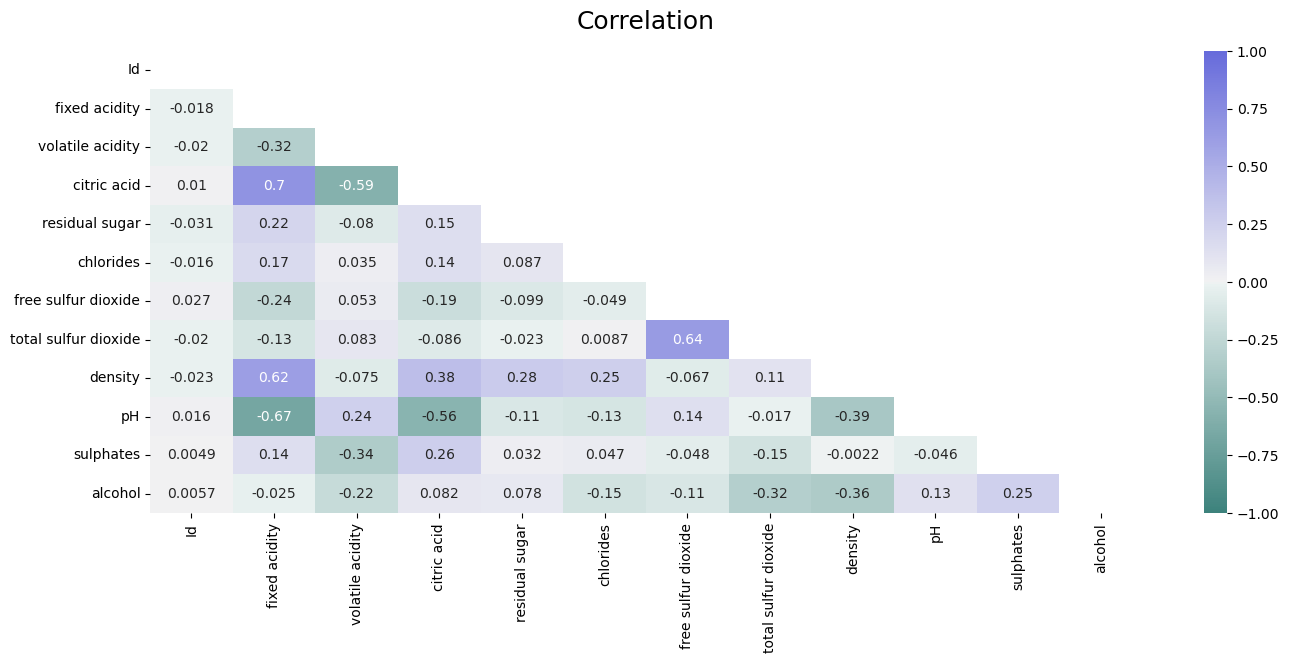

In [3]:
# Drop quality column from correlation plot. Set up cmap
data_no_qual = data.drop(columns=["quality"])
cmap = sns.diverging_palette(183, 265, as_cmap=True)

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data_no_qual.corr(), dtype=bool))
heatmap = sns.heatmap(data_no_qual.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16)

## Correlations to investigate for Feature Engineering
Positive correlations
- fixed acidity and citric acid
- fixed acidity and density
- free sulfur dioxide and total sulfur dioxide

Negative correlations
- fixed acidity and pH
- volatile acidity and citric acid
- citric acid and pH

fixed acidity - total amount of acid g/L
citric acid - amount of citric acid g/L or meq/L (in small amounts in wine)
ratio of citric acid/fixed acidity?

Why is there a positive correlation between fixed acidity and density?
chatgpt says it should be an inverse relationship

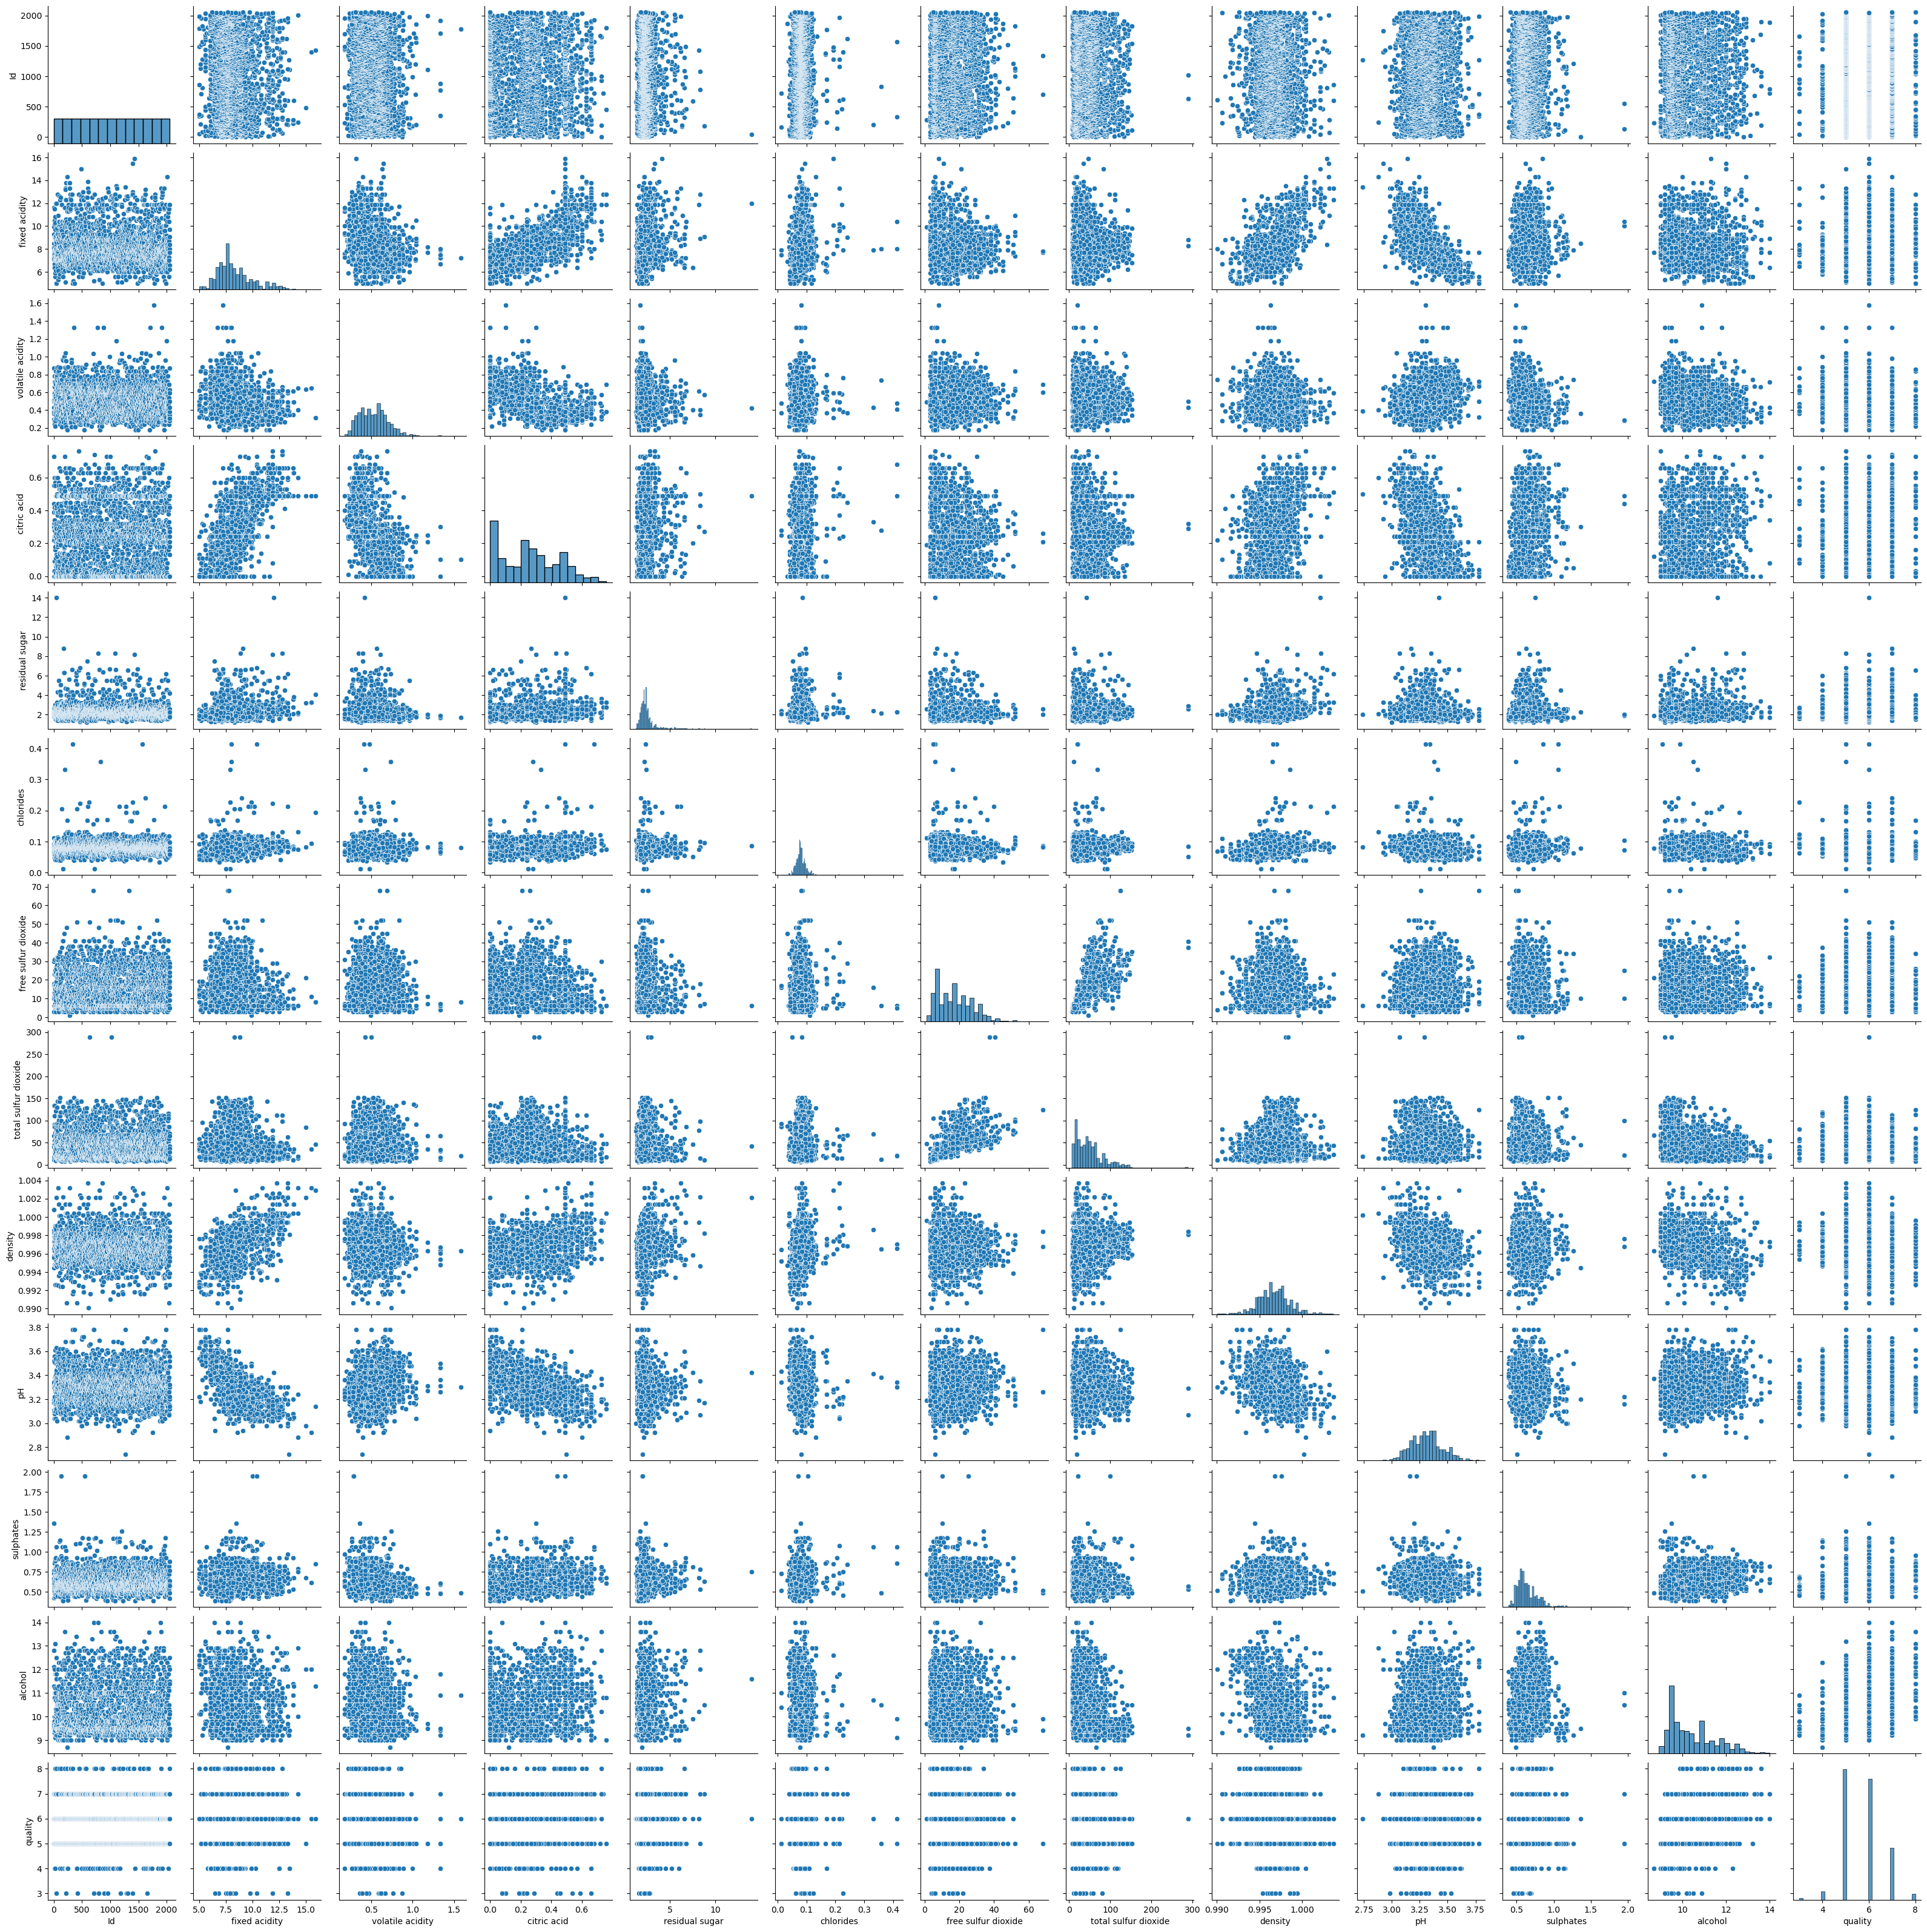

In [4]:
sns.pairplot(data)

## Correlations between features and Quality

Text(0.5, 1.0, 'Features Correlating with Quality')

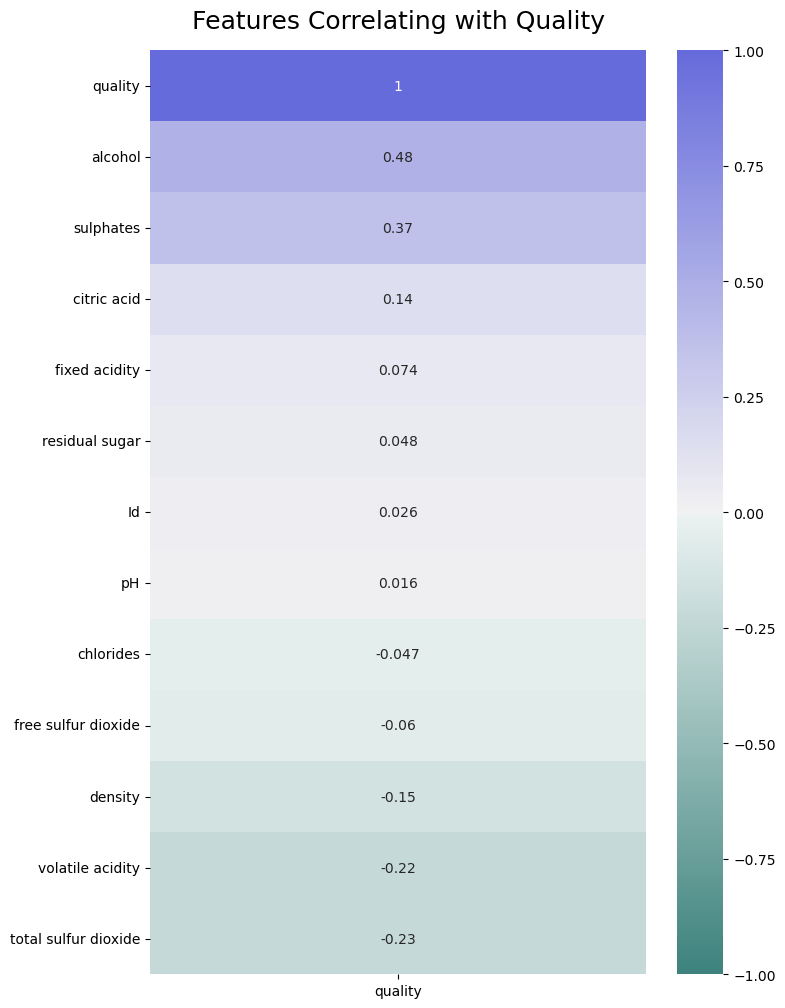

In [5]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['quality']].sort_values(by='quality', ascending=False), 
vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Features Correlating with Quality', fontdict={'fontsize':18}, pad=16)

Alcohol and Sulphates have relatively strong correlation with Quality

# Data Cleaning
- Drop Duplicates
- Handle Outliers

In [6]:
# drop duplicates
data = data.drop_duplicates()
data[data.duplicated()]

Empty DataFrame
Columns: [Id, fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [7]:
# Define a function to replace outliers with the median
def replace_outliers_with_median(df, feature, target):
    # Calculate the first and third quartiles
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the upper and lower bounds for outliers
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    # Replace the outliers with the median value for that target group
    for t in df[target].unique():
        median = df.loc[df[target]==t, feature].median()
        df.loc[(df[target]==t) & ((df[feature] < lower_bound) | (df[feature] > upper_bound)), feature] = median


In [8]:
# Replace outliers with the median for each feature and outcome group
for feature in data.columns[:-1]:
    replace_outliers_with_median(data, feature, 'quality')

# Feature Engineering
<hr>

## Transformations

### Scaling Technique

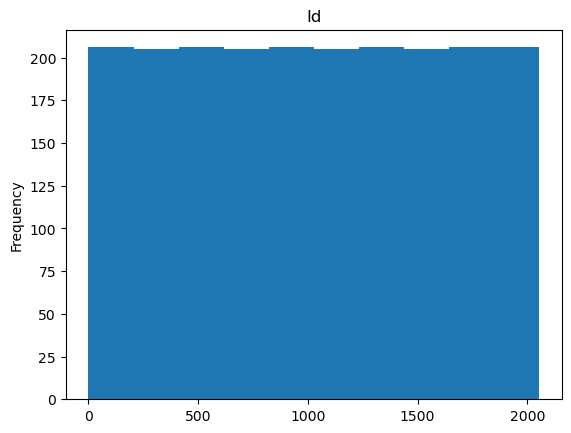

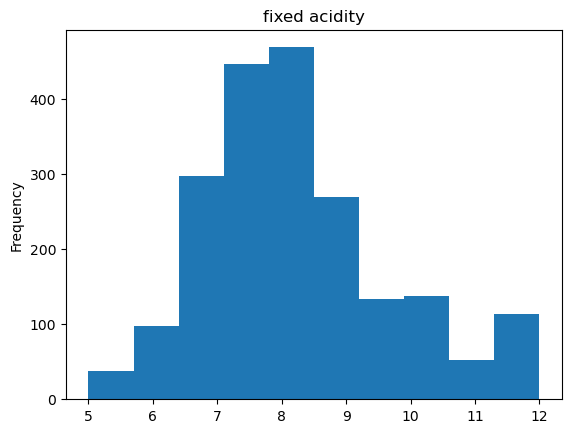

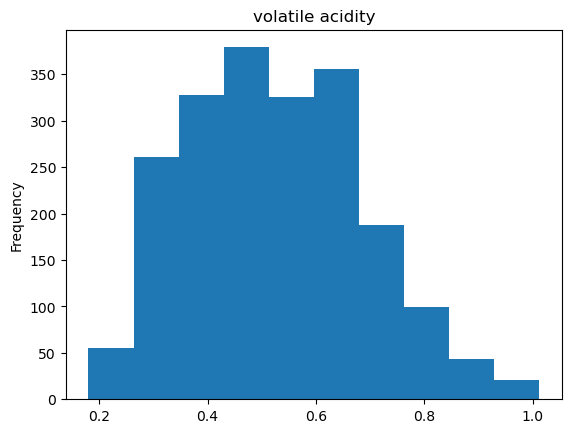

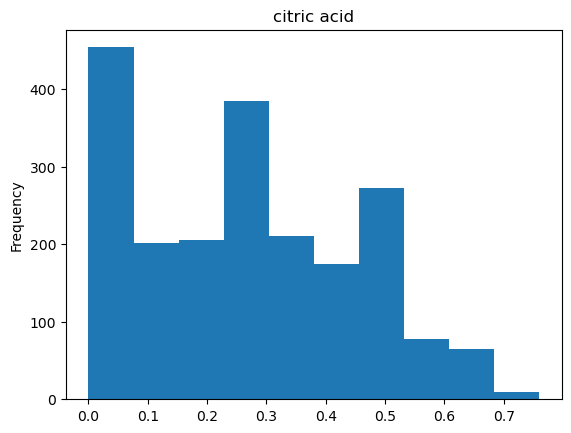

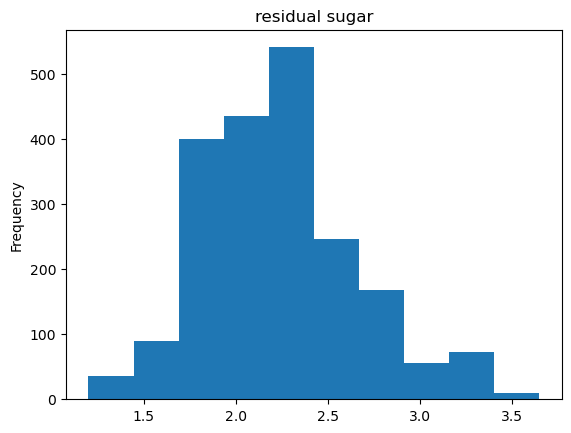

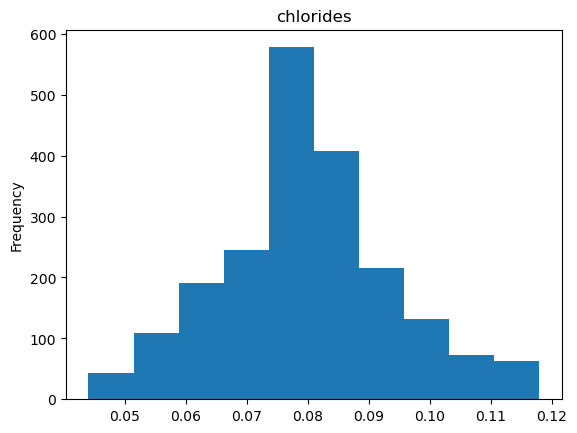

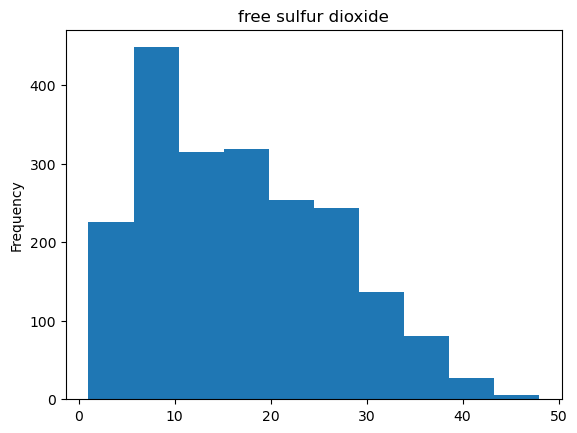

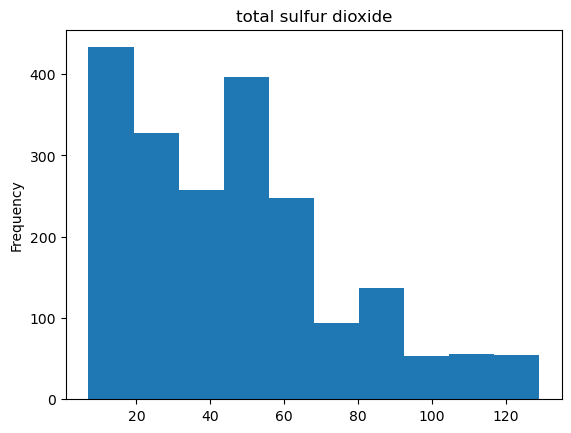

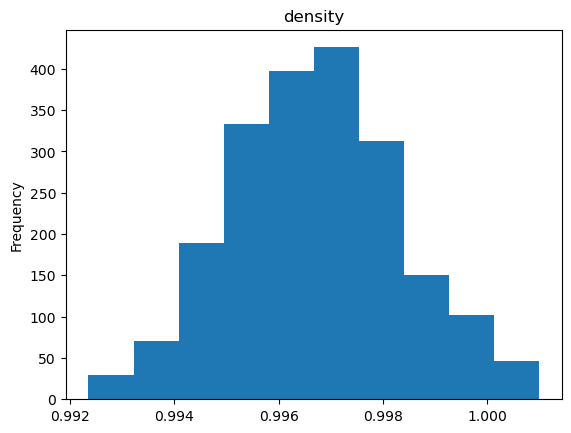

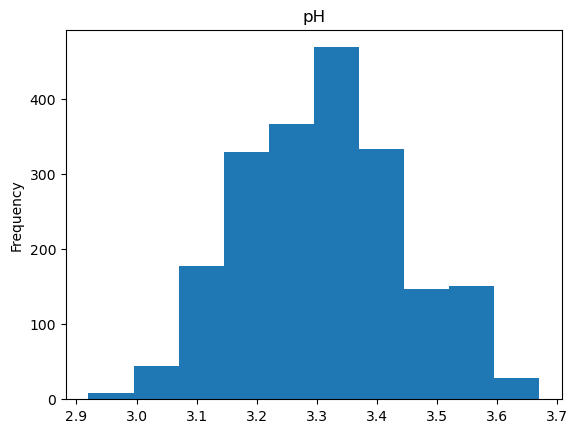

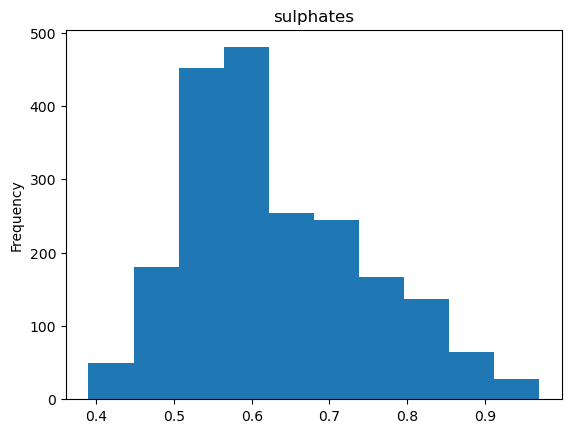

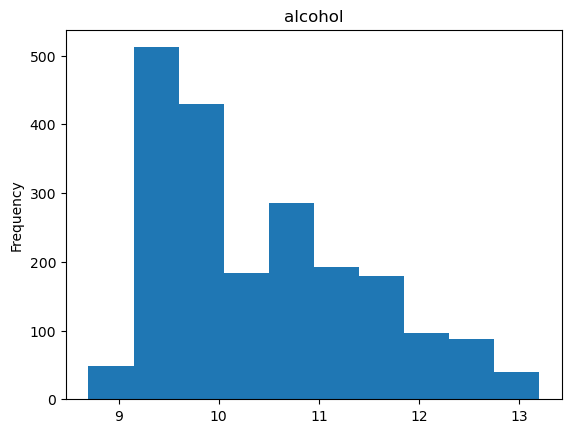

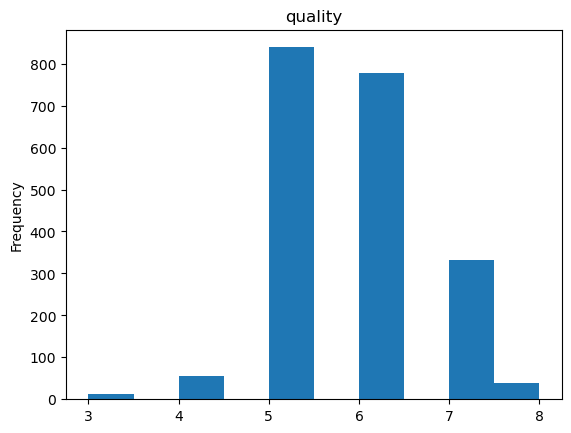

In [9]:

for i, col in enumerate(data.columns):
    data[col].plot(kind="hist", fig=plt.figure(i))
    plt.title(col)

plt.show()

Not all normal distributions, so don't use normal distribution scalars